In [1]:
%pip install --upgrade scikit-learn==0.23.0


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [4]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
mod=KNeighborsRegressor()
mod.fit(X,y)
pipe=Pipeline([('scale',StandardScaler()),
              ('model',KNeighborsRegressor(n_neighbors=1))])
# pipe.fit(X,y)
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

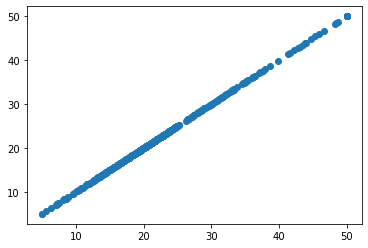

In [24]:
plt.scatter(pred,y)

In [43]:
mod=GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
            cv=3)

In [45]:
mod.fit(X,y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003246,0.000998,0.004484,0.000539,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.004187,0.003622,0.001156,0.001635,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.009311,0.006738,0.000667,0.000472,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.005206,0.007363,0.002999,0.002256,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.000674,0.000953,0.006491,0.004675,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002366,0.003347,0.003532,0.003659,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.010103,0.007156,0.001007,0.000825,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.004883,0.006906,0.001188,0.001680,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.009897,0.007145,0.000343,0.000485,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000000,0.000000,0.011129,0.007912,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [47]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('drawndata2.csv')

In [20]:
df.head(3)

,rowid,x,y,z
0,1,469.759355,453.574946,a
1,2,535.331819,435.221848,a
2,3,504.285526,437.767578,a


In [21]:
X=df[['x','y']].values
y=df['z']=='a'

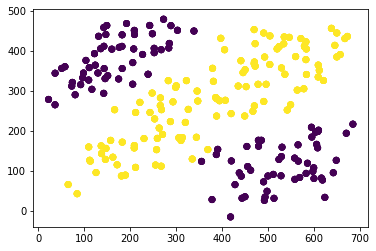

In [22]:
plt.scatter(X[:,0],X[:,1],c=y)

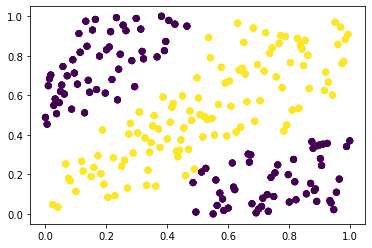

In [23]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
X_new=QuantileTransformer().fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

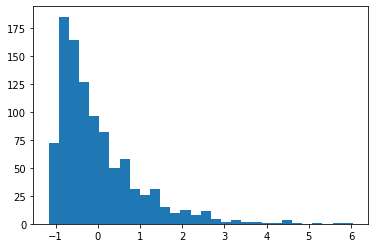

In [18]:
x=np.random.exponential(10,1000)+np.random.normal(0,1,(1000))
plt.hist((x-np.mean(x))/np.std(x),30);

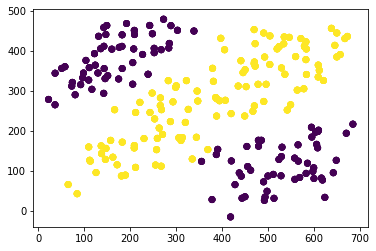

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe=Pipeline([
    ('scale',PolynomialFeatures()),
    ('model',LogisticRegression())
])
pred=pipe.fit(X,y).predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

In [31]:
arr=np.array(['low','low','high','medium']).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
enc=OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [38]:
enc.transform([['zero']])

array([[0., 0., 0.]])

In [39]:
df=pd.read_clipboard(sep=',')

In [40]:
df

,x,y,z
0,349,294,a
1,348,296,a
2,346,299,a
3,340,304,a
4,336,306,a
...,...,...,...
161,555,270,b
162,584,292,b
163,597,302,b
164,604,307,b


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [5]:
data=pd.read_csv('bigmart/bigmart.csv')

In [16]:
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [57]:
X=data[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_MRP']].values
y=data[['Item_Type']].values
le=LabelEncoder()
for i in range(len(X[0])):
    X[:,i]=le.fit_transform(X[:,i])
# for i in range(len(y[0])):
#     y[:,i]=le.fit_transform(y[:,i])
# # print(X)
print(y)
# mod=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# mod.fit(X_train,y_train)
pipe=Pipeline([
    ('scale',QuantileTransformer()),
    ('model',DecisionTreeClassifier())
])
pipe.get_params()

[['Dairy']
 ['Soft Drinks']
 ['Meat']
 ...
 ['Health and Hygiene']
 ['Snack Foods']
 ['Soft Drinks']]


{'memory': None,
 'steps': [('scale', QuantileTransformer()),
  ('model', DecisionTreeClassifier())],
 'verbose': False,
 'scale': QuantileTransformer(),
 'model': DecisionTreeClassifier(),
 'scale__copy': True,
 'scale__ignore_implicit_zeros': False,
 'scale__n_quantiles': 1000,
 'scale__output_distribution': 'uniform',
 'scale__random_state': None,
 'scale__subsample': 100000,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_impurity_split': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__presort': 'deprecated',
 'model__random_state': None,
 'model__splitter': 'best'}

In [54]:
mod=GridSearchCV(estimator=pipe,
                param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                cv=3)

In [61]:
pipe.fit(X_train,y_train)
pred=pipe.predict(X_test)
score=accuracy_score(pred,y_test)
print("Prediction:",pred)
print("Actual:",y_test)
print('Score',score)
# plt.scatter(y_test,pred)
# plt.show()

Prediction: ['Household' 'Household' 'Soft Drinks' ... 'Baking Goods' 'Soft Drinks'
 'Fruits and Vegetables']
Actual: [['Household']
 ['Household']
 ['Soft Drinks']
 ...
 ['Baking Goods']
 ['Soft Drinks']
 ['Fruits and Vegetables']]
Score 0.8791788856304985


In [62]:
pd.DataFrame(mod.cv_results_)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'